Привет! меня зовут Люман Аблаев. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на красные комментарии ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:


<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ..
</div>
<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

<font color='orange' style='font-size:24px; font-weight:bold'>Общее впечатление</font>
* Спасибо за  качественную работу, было интересно ее проверять.
- Я оставил некоторые советы надеюсь они будут полезными или интересными.

- Есть небольшие недочеты, но думаю у тебя не составить труда их исправить
- Жду обновленную работу!

<font color='orange' style='font-size:24px; font-weight:bold'>Общее впечатление[2]</font>
* Спасибо за оперативность
- Приятно видеть фидбек 
- Недочеты исправлены - работа полностью корректна
- Рад был быть полезен. Удачи в дальнейшем обучении!



# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



<div class="alert alert-block alert-success">
<b>Успех:</b> Импорты  на месте
</div>



## Загрузка и подготовка данных

### Загрузка данных

In [2]:
reg_1 = pd.read_csv('/datasets/geo_data_0.csv')
reg_2 = pd.read_csv('/datasets/geo_data_1.csv')
reg_3 = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
for table in [reg_1, reg_2, reg_3]:
    print(table.head())
    print()

      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647

      id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305

      id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX -0.515993  1.716266  5.899011  149.600746



In [4]:
for table in [reg_1, reg_2, reg_3]:
    table.info()
    print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Nul

__Данные загрузили__

### Предобработка данных

In [5]:
for df in [reg_1, reg_2, reg_3]:
    print('Проверка на явные дубли:', df.duplicated().sum())

Проверка на явные дубли: 0
Проверка на явные дубли: 0
Проверка на явные дубли: 0


In [6]:
reg_3['id'].nunique()

99996

In [7]:
for df in [reg_1, reg_2, reg_3]:
    print(df['id'].nunique())
    print()

99990

99996

99996



__В таблицах по 100 000 строк, нет явных дублей, однако, есть повторяющиеся уникальные идентификаторы скважин.__

In [8]:
reg_1[reg_1['id'].duplicated(keep=False)].sort_values(by='id')

,id,f0,f1,f2,product
66136,74z30,1.084962,-0.312358,6.990771,127.643327
64022,74z30,0.741456,0.459229,5.153109,140.771492
51970,A5aEY,-0.180335,0.935548,-2.094773,33.020205
3389,A5aEY,-0.039949,0.156872,0.209861,89.249364
69163,AGS9W,-0.933795,0.116194,-3.655896,19.230453
42529,AGS9W,1.454747,-0.479651,0.683380,126.370504
931,HZww2,0.755284,0.368511,1.863211,30.681774
7530,HZww2,1.061194,-0.373969,10.430210,158.828695
63593,QcMuo,0.635635,-0.473422,0.862670,64.578675
1949,QcMuo,0.506563,-0.323775,-2.215583,75.496502


In [9]:
reg_2[reg_2['id'].duplicated(keep=False)].sort_values(by='id')

,id,f0,f1,f2,product
5849,5ltQ6,-3.435401,-12.296043,1.999796,57.085625
84461,5ltQ6,18.213839,2.191999,3.993869,107.813044
1305,LHZR0,11.170835,-1.945066,3.002872,80.859783
41906,LHZR0,-8.989672,-4.286607,2.009139,57.085625
2721,bfPNe,-9.494442,-5.463692,4.006042,110.992147
82178,bfPNe,-6.202799,-4.820045,2.995107,84.038886
47591,wt4Uk,-9.091098,-8.109279,-0.002314,3.179103
82873,wt4Uk,10.259972,-9.376355,4.994297,134.766305


In [10]:
reg_3[reg_3['id'].duplicated(keep=False)].sort_values(by='id')

,id,f0,f1,f2,product
45404,KUPhW,0.231846,-1.698941,4.990775,11.716299
55967,KUPhW,1.211150,3.176408,5.543540,132.831802
11449,VF7Jo,2.122656,-0.858275,5.746001,181.716817
49564,VF7Jo,-0.883115,0.560537,0.723601,136.233420
44378,Vcm5J,-1.229484,-2.439204,1.222909,137.968290
95090,Vcm5J,2.587702,1.986875,2.482245,92.327572
28039,xCHr8,1.633027,0.368135,-2.378367,6.120525
43233,xCHr8,-0.847066,2.101796,5.597130,184.388641


__Так как данные синтетические, предлагаю использовать только индексы в качестве скважин.__

In [11]:
for df in [reg_1, reg_2, reg_3]:
    df = df.drop(columns='id')

In [12]:
reg_1 = reg_1.drop(columns='id')
reg_2 = reg_2.drop(columns='id')
reg_3 = reg_3.drop(columns='id')

In [13]:
reg_1.head()

,f0,f1,f2,product
0,0.705745,-0.497823,1.221170,105.280062
1,1.334711,-0.340164,4.365080,73.037750
2,1.022732,0.151990,1.419926,85.265647
3,-0.032172,0.139033,2.978566,168.620776
4,1.988431,0.155413,4.751769,154.036647


### Исследовательский анализ данных

In [14]:
def exploratory_analysis(df):
    cols = df.select_dtypes(include=['float64']).columns
    for i in cols:
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
        bins= ax1.hist(x=df[i])
        ax1.vlines(x=df[i].mean(), colors='red', ymin=bins[0].min(), ymax=bins[0].max(), label='Среднее')
        ax1.vlines(x=df[i].median(), colors='red', ymin=bins[0].min(), ymax=bins[0].max(), linestyles='--', label='Медиана')
        ax1.set_title(f'Гистограмма распределения: {i}')
        ax1.set_xlabel('Значения')
        ax1.set_ylabel('Частота')
        ax1.legend(loc='upper right', framealpha=0.3)
        
        ax2.boxplot(df[i], vert=False)
        ax2.set_title(f'Boxplot: {i}')
        ax2.set_xlabel('Значения')
        ax2.set_yticks([])
        y = np.ones_like(df[i])  
        ax2.scatter(df[i], y, color='blue', alpha=0.5, label='Значения')
        ax2.legend(loc='upper right')
        
        
        plt.show()

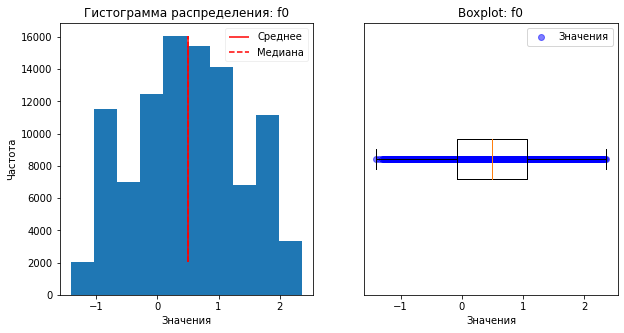

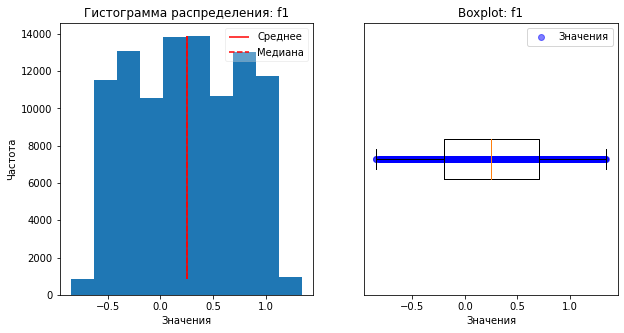

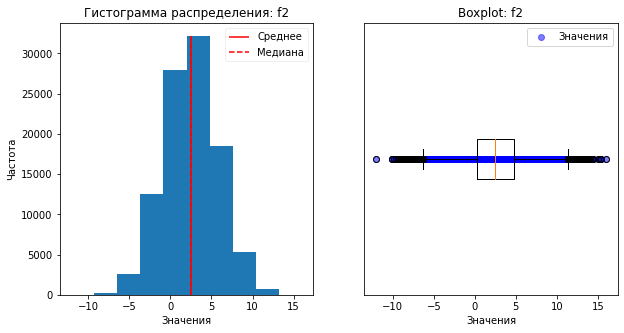

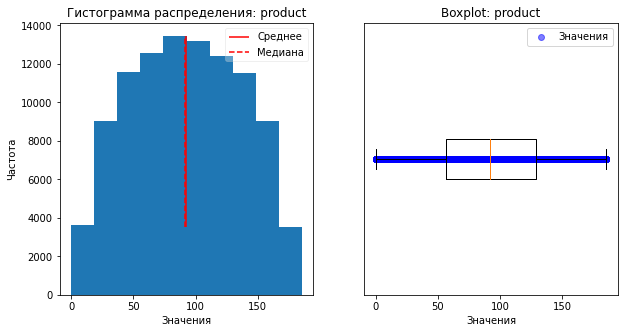

In [15]:
exploratory_analysis(reg_1)

In [16]:
reg_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


__Итак в регионе 1:__
- f0 среднее равно медиане 0,5 , распределение почти симетричное с несколькими пиками. Выбросов нет
- f1 среднее равно медиане, 0,25, распределение  симетричное с несколькими пиками. Выбросов нет
- f2 среднее почти равно медиане 2,5 , распределение почти нормальное, имееются выбросы с обоих сторон. 
- product целевой признак среднее почти равно медиане 92, распределение похоже на нормальное, выбросов нет

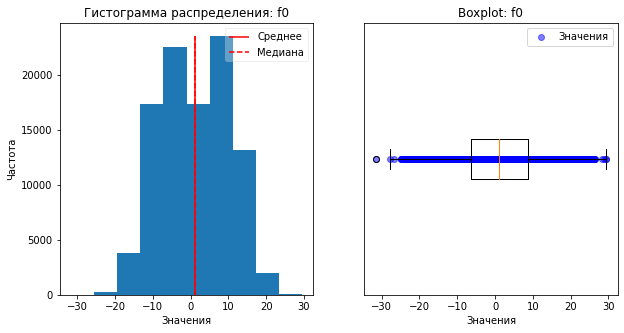

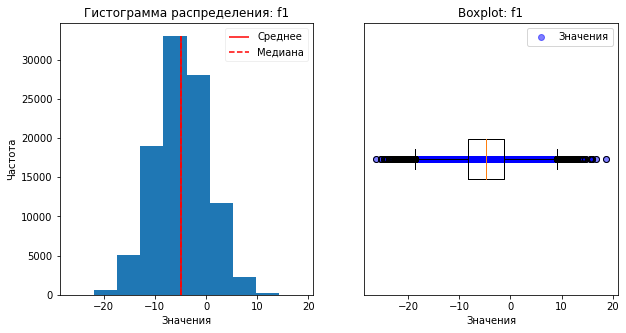

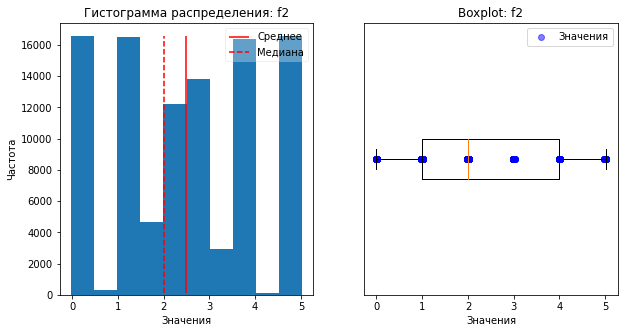

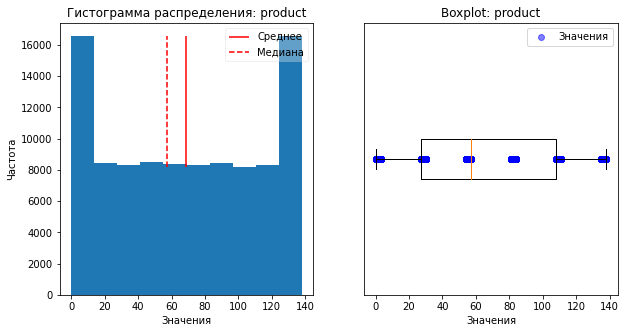

In [17]:
exploratory_analysis(reg_2)

In [18]:
reg_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


__Регион 2__
- f0 среднее равно медиане 1,14, есть выбросы слева, распределение почти симметричное с нескольки пиками
- f1 среднне почти равно медиане -4,8 , выбросы с обоих сторон, распредление почти симметричное
- f2 среднее больше медианы 2,49 против 2,01, выбросов нет, распределение с множеством пик
- product целевой распределен бимодально, среднее больше медианы, 68.8 против 57.08, выбросов нет

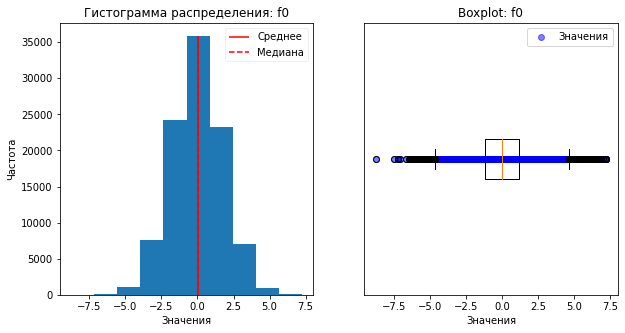

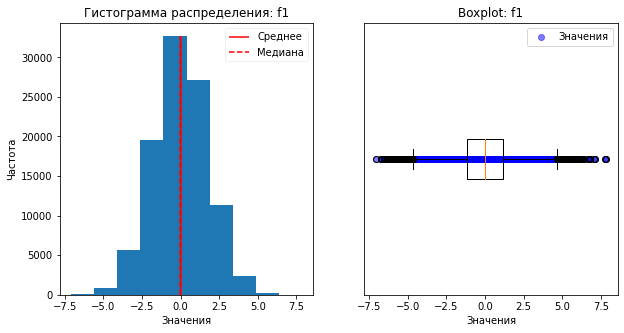

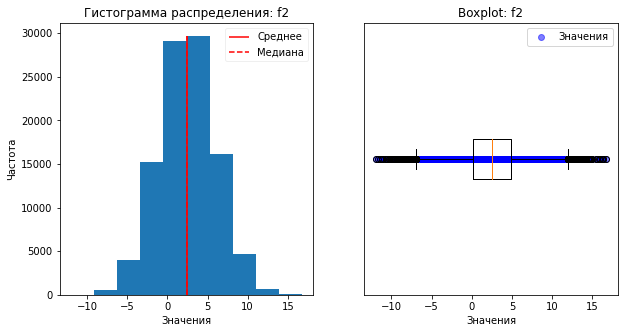

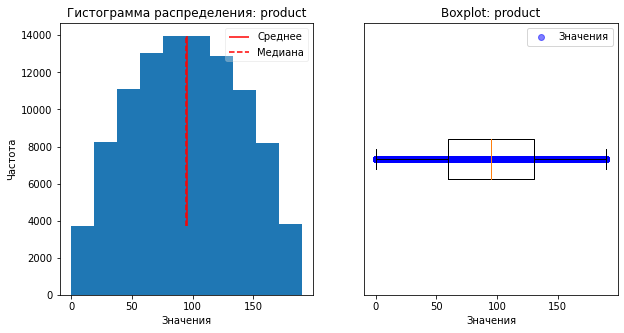

In [19]:
exploratory_analysis(reg_3)

In [20]:
reg_3.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


__Регион 3__:
- f0 распределение почти нормальное, среднее немного меньше медианы 0,002 против 0,01, есть выбросы с обоих сторон
- f1 среднее -0,002 против -0,009 медианы, выбросы с обоих сторон.
- f2 распределение почти нормальое, среднее равно медиане 2,49, выбросы с обоих сторон
- product целевой распределение почти нормальое, среднее равно медиане 95, выброов нет

__В ходе исследовательского анализа выявлено:__
- Входные и целевые признаки по разному распределены и имеют разный разброс значений по 3м регионам.

### Корреляционный анализ

Так как по условию задачи указано использовать только линейную регрессию, проверим коефициенты Пирсона, а не Фик

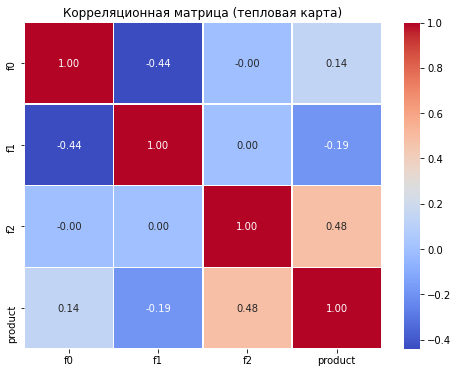

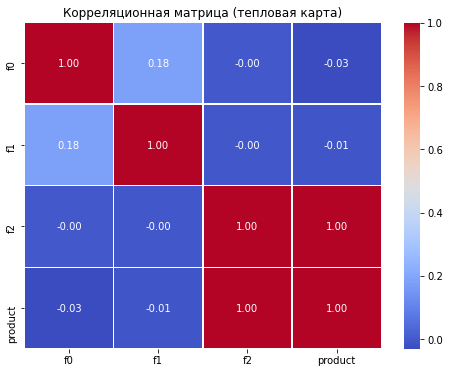

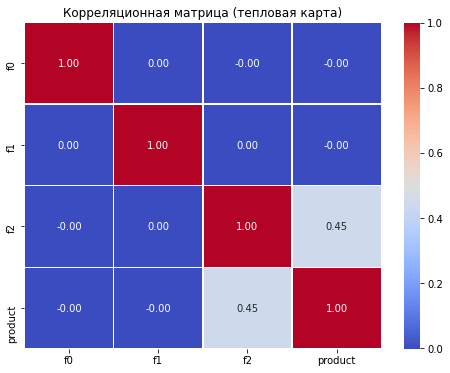

In [21]:
for df in [reg_1, reg_2, reg_3]:
    corr_mtrx = df.corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_mtrx, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Корреляционная матрица (тепловая карта)')
    plt.show()

__Анализ на линейные связи:__
- reg_1 целевой признак имеет слабую связь с f0, f1 и почти заметную с f2 
- reg_2 целевой признак имеет абсолютный коефициент корреляции пирсона с f2
- reg_3 целевой признак имеет умеренную связь с f2 согласно шкале Чеддока

Мультиколлинераность отсутсвует


<div class="alert alert-block alert-success">
<b>Успех:</b> Данные осмотрены хорошо, особенно радует, что изучены корреляции, так как мы планируем использовать линейные модели, а для них это важно. 
</div>
<div class="alert alert-block alert-info">
<b>Совет:</b>  Советую обратить внимание на библиотеки sweetviz и ydata_profiling помогут в проведении более тщательного EDA анализа. Исследовательский анализ можно делать и с помощью ручного вызова функций дефолтных библиотек. Данные библиотеки хороши для максимизации комфорта презентации результатов анализа бизнес-пользователям.  

Очень просты в использоовании, на вход кладется датафрейм: ydata_profiling.ProfileReport(df) 
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Привет! Ок, спасибо, посмотрю
</div>


<div class="alert alert-block alert-success">
    
<b>Успех[2]:</b> Главное во время обучения не злоупотреблять, чтобы руки не забыл как делать EDA анализ)
</div>


## Обучение и проверка модели

Зафиксируем константы

In [22]:
RANDOM_STATE = 42
VALID_SIZE = 0.25

Создадим функцию по обработке данных, используем StandardScaler для масштабирования входных признаков.

In [23]:
def prepare_data(df):
    X = df.drop(columns='product')
    y = df['product']
    X_train, X_valid, y_train, y_valid = train_test_split(
        X,
        y,
        test_size=VALID_SIZE,
        random_state=RANDOM_STATE)
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_valid = scaler.transform(X_valid)
    X_train = pd.DataFrame(X_train, columns=X.columns)
    X_valid = pd.DataFrame(X_valid, columns=X.columns)
    
    return X_train, X_valid, y_train, y_valid


<div class="alert alert-block alert-success">
<b>Успех:</b> Хороший помощник! Масштабирование проведено корректно
</div

__Region 1__

In [24]:
X_train_1, X_valid_1, y_train_1, y_valid_1 = prepare_data(reg_1)

In [25]:
X_train_1.shape, X_valid_1.shape, y_train_1.shape, y_valid_1.shape


((75000, 3), (25000, 3), (75000,), (25000,))

Регуляризацию предлагаю не использовать, так как входных признаков всего 3.

In [26]:
model_1 = LinearRegression()
model_1.fit(X_train_1, y_train_1)
pred_1 = model_1.predict(X_valid_1)
print(f'Средний запас предсказанного сырья в валидационной выборке {round(pred_1.mean(),2)}')
print(f'RMSE равен {round(mean_squared_error(y_valid_1, pred_1,squared=False),2)}')

Средний запас предсказанного сырья в валидационной выборке 92.4
RMSE равен 37.76


__Region 2__

In [27]:
X_train_2, X_valid_2, y_train_2, y_valid_2 = prepare_data(reg_2)

In [28]:
model_2 = LinearRegression()
model_2.fit(X_train_2, y_train_2)
pred_2 = model_2.predict(X_valid_2)
print(f'Средний запас предсказанного сырья в валидационной выборке модели  {round(pred_2.mean(),2)}')
print(f'RMSE равен {round(mean_squared_error(y_valid_2, pred_2,squared=False),2)}')

Средний запас предсказанного сырья в валидационной выборке модели  68.71
RMSE равен 0.89


__Region 3__

In [29]:
X_train_3, X_valid_3, y_train_3, y_valid_3 = prepare_data(reg_3)

In [30]:
model_3 = LinearRegression()
model_3.fit(X_train_3, y_train_3)
pred_3 = model_3.predict(X_valid_3)
print(f'Средний запас предсказанного сырья в валидационной выборке модели  {round(pred_3.mean(),2)}')
print(f'RMSE равен {round(mean_squared_error(y_valid_3, pred_3,squared=False),2)}')

Средний запас предсказанного сырья в валидационной выборке модели  94.77
RMSE равен 40.15


__Модели обучены, метрики выведены. очевидно, что RMSE модели 2 почти равен 0 из за высокой корреляции ф2 и целевого признака__


<div class="alert alert-block alert-success">
<b>Успех:</b> Шаг проделан лаконично, все метрики посчитаны корректно
</div> 



## Подготовка к расчёту прибыли
- Все ключевые значения для расчётов сохраните в отдельных переменных.
- Рассчитайте достаточный объём сырья для безубыточной разработки новой скважины. Сравните полученный объём сырья со средним запасом в каждом регионе. 

- Итак, объем product уже указан в тысячах баррелей, поэтому доход с каждой единицы продукта составляет 450 тыс. рублей
- При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
- Бюджет на разработку скважин в регионе — 10 млрд рублей.

выручка с барреля (миллионов рублей):

In [31]:
rev_per_barrel = 0.45

Бюджет на разработку в регионе(миллионов рублей)

In [32]:
budget_per_reg = 10000


<div class="alert alert-block alert-info">
    
<b>Совет:</b> Константы принято записывать в ВЕРХНЕМ РЕГИСТРЕ =) Читем здесь https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html#section-29
    
А большие значение можно записывать так: `10_000`.
</div> 



<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Ок, спасибо, буду иметь в виду
</div>

Следовательно бюджет на скважину миллионов рублей:

In [33]:
budget_per_id = budget_per_reg/200
budget_per_id

50.0

Минимальный объем сырья (тысяч баррелей) для безубыточной добычи на одной скважине:

In [34]:
min_product = round(50/rev_per_barrel,2)
min_product

111.11

Минимальный объем сырья (тысяч баррелей) для безубыточной добычи на 200ста скважинах в регионе:

In [35]:
min_pr_reg_200 = min_product*200
min_pr_reg_200

22222.0

In [36]:
for df in [reg_1, reg_2, reg_3]:
    print (df['product'].mean())

92.50000000000001
68.82500000000002
95.00000000000004


- Минимальный требуемый средний объем сырья со скважины в регионе для безубыточной добычи является 111,11 тысяч баррелей.
- Если взять средний объем продукта по 3м регионам, то средний объем по всем скважинам в регионе меньше требуемого минимума. 
- Соответвенно необходим отбор 200 скважин в регионе с наибольшей добычей с минимумом 111,11 тысяч баррелей.

<div class="alert alert-block alert-success">
<b>Успех:</b> Значение для безубыточной разработки посчитано верно, с выводом согласен  
</div>


## Расчёт прибыли

Подготовим датафреймы для 3х регионов

In [37]:
valid_df_1 = pd.concat([X_valid_1, y_valid_1.reset_index(drop=True)], axis=1)
valid_df_1['pr_pred'] = pred_1

valid_df_2 = pd.concat([X_valid_2, y_valid_2.reset_index(drop=True)], axis=1)
valid_df_2['pr_pred'] = pred_2

valid_df_3 = pd.concat([X_valid_3, y_valid_3.reset_index(drop=True)], axis=1)
valid_df_3['pr_pred'] = pred_3

In [38]:
def rev_calc(df):
    df_sorted = df.sort_values(by='pr_pred', ascending=False).head(200)
    prod = round(df_sorted['product'].sum(), 2)
    prod_mean = round(df_sorted['product'].mean(),2)
    rev = round(prod * rev_per_barrel,2)
    rev_mean = round(prod_mean * rev_per_barrel,2)
    
    
    
    print(f'Фактическая добыча по 200 отобранным моделью скважинам в регионе составляет {prod} тысяч баррелей\n'
          f'Средний объем добычи со скважины {prod_mean}\n'
          f'Фактическая выручка от добычи в регионе по скважинам отобранным моделью составляет {rev} млн.руб.\n'
          f'Средняя выручка со скважины {rev_mean} млн.руб. \n'
          f'Прибыль по региону составит {round(rev - budget_per_reg,2)} млн.руб.')
    

__Region 1__

In [39]:
rev_calc(valid_df_1)

Фактическая добыча по 200 отобранным моделью скважинам в регионе составляет 29686.98 тысяч баррелей
Средний объем добычи со скважины 148.43
Фактическая выручка от добычи в регионе по скважинам отобранным моделью составляет 13359.14 млн.руб.
Средняя выручка со скважины 66.79 млн.руб. 
Прибыль по региону составит 3359.14 млн.руб.


__Region 2__

In [40]:
rev_calc(valid_df_2)

Фактическая добыча по 200 отобранным моделью скважинам в регионе составляет 27589.08 тысяч баррелей
Средний объем добычи со скважины 137.95
Фактическая выручка от добычи в регионе по скважинам отобранным моделью составляет 12415.09 млн.руб.
Средняя выручка со скважины 62.08 млн.руб. 
Прибыль по региону составит 2415.09 млн.руб.


__Region 3__

In [41]:
rev_calc(valid_df_3)

Фактическая добыча по 200 отобранным моделью скважинам в регионе составляет 27996.83 тысяч баррелей
Средний объем добычи со скважины 139.98
Фактическая выручка от добычи в регионе по скважинам отобранным моделью составляет 12598.57 млн.руб.
Средняя выручка со скважины 62.99 млн.руб. 
Прибыль по региону составит 2598.57 млн.руб.


__Вывод__:
- С помощью моделей линейной регрессии, даже не смотря на относительно не высокую точность первой и третьей модели
- По всем трем регионам модель отобрала скважины, которые выводят добычу в регионах на безубыточную.
- Подробнее выше


## Посчитайте риски и прибыль для каждого региона

### Примените технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.


<div class="alert alert-block alert-danger">
<b>Ошибка:</b>  Тебе не нужно заранее сортировать данные и считать прибыль. Это нужно делать во время бутстрапа, сначала случайным образм отбираем 500 скважин, среди них находим 200 лучших по предсказаниям и считаем прибыль по таргетам.

In [43]:
STATE = np.random.RandomState(12345)

In [50]:
def bootstrap(df):
    values = []
    for i in range(1000):
        subsample = df.sample(n=500, replace=True, random_state=STATE)
        subsample = subsample.sort_values(by='pr_pred', ascending=False).head(200)
        profit_per_reg = subsample['product'].sum() * rev_per_barrel - budget_per_reg
        values.append(profit_per_reg)
    return values            
        

In [51]:
profits_per_reg_1 = bootstrap(valid_df_1)
profits_per_reg_2 = bootstrap(valid_df_2)
profits_per_reg_3 = bootstrap(valid_df_3)

__Итак, сохранили полученные значения прибыли по 3м регионам в млн.рублей, используя технику bootstrap.__


<div class="alert alert-block alert-danger">
<b>Ошибка
    :</b>  Как сказал выше, здесь работаем не с прибылью, а с объемом сырья. На каждой итерации нужно отбирать 500 скважин, то есть frac должен быть другой

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> понял, исправил выше
</div>


<div class="alert alert-block alert-success">
    
<b>Успех[2]:</b> Есть контакт
</div>


### Найдите среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.

Создадим функцию для рассчетов. Так как выше мы создали лист с листами бутсрепом, нужно развенуть все в 1 лист

In [54]:
def bootstrap_explore(list):
    #list = np.concatenate(bootstrap_samples).tolist()
    plt.hist(list)
    plt.title('Гитограмма распределения прибылей по региону с бутстрепом 1000')
    plt.xlabel('Прибыль (млн.руб)')
    plt.ylabel('Частота')
    plt.show()
    mean = round(np.mean(list),2)
    print(f'Средняя прибыль: {mean}млн.руб')
    lower = round(np.percentile(list, 2.5), 2)
    upper = round(np.percentile(list, 97.5), 2)
    print(f'95% процентов значений прибыли находятся между {lower}млн.руб и  {upper}млн.руб')
    risk = np.count_nonzero(np.array(list) < 0) / len(list)
    print(f'Риск убытков: {risk:.2%}')

<div class="alert alert-block alert-success">
<b>Успех:</b> Метрики на первый взгляд считаются верным образом


__Регион 1__

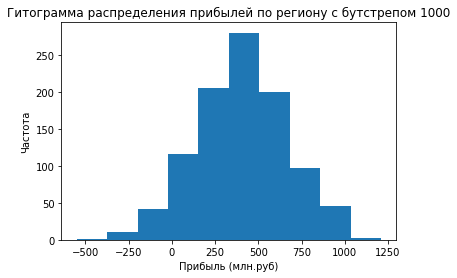

Средняя прибыль: 407.19млн.руб
95% процентов значений прибыли находятся между -110.05млн.руб и  915.06млн.руб
Риск убытков: 6.10%


In [55]:
bootstrap_explore(profits_per_reg_1)

__Регион 2__

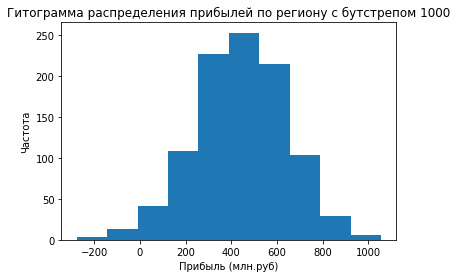

Средняя прибыль: 442.63млн.руб
95% процентов значений прибыли находятся между 21.77млн.руб и  820.18млн.руб
Риск убытков: 1.90%


In [56]:
bootstrap_explore(profits_per_reg_2)

__Регион 3__

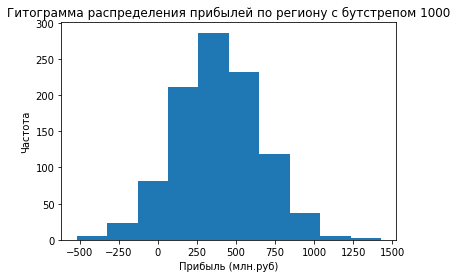

Средняя прибыль: 387.1млн.руб
95% процентов значений прибыли находятся между -134.46млн.руб и  889.79млн.руб
Риск убытков: 6.60%


In [57]:
bootstrap_explore(profits_per_reg_3)

__Промежуточный вывод__:
- Проведя анализ выше, можно утвержать, что регион 2 наименее привлекателен для разработки. Наивысшая средняя прибыль по региону с применением бустрепа с 1000 итераций 443 млн. руб, риск убытков наименьший, 1.9%. 95% процентов значений прибыли находятся между 21.77млн.руб и  820.18млн.руб. Однако, необходимо все же проверить исходные данные, так как и корреляция у f2 с целевым в данном регионе абсолютная.
- Регион 1 и регион 3 уступают региону 2.  Риск убытков между 6-7%. Подробнее выше.

## Итоговый вывод

- В ходе работ были выполнены:
    - предобработка и исследовательский анализ данных по скважинам в трех предоставленных регионах
    - корреляционный анализ данных
    - были обучены модели МО линейной регрессии для трех регионов и оцены по метрике RMSE
    - отобраны 200 скважин с наилучшими предсказаниями моделями в 3х регионах
    - рассчитана прибыль по отобранным скважинам
    - методом bootstrap проанализирована прибыльность и вероятность убытков, выбран регион.
- В заключение
    - методы МО продемонстировали себя обнадеживающе и положительно, без прогнозирования добычи и ранжирования скважин моделями, отобрать прибыльные крайне трудно, так как средняя добыча по всем скважинам меньше требуемого минимума для выхода в плюс.
    - МО же напротив, сокращает риск убытков до 2% на примере региона 2 и отбирает 200 скважин со средней прибылью 443 млн. руб по региону.




<div class="alert alert-block alert-info">
<b>Совет: </b>
    
Не забудь обновить выводы, если потребуется
</div>                                                              


<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Обновил
</div>

<div class="alert alert-block alert-success">
<b>Успех[2]:</b> Отлично, проведено детальное исследование и был выбран правильный регион!
</div>



<div class="alert alert-block alert-info">
<b>Совет[2]: </b> Если интересно изучить тему бутстрапа глубже - я оставлю  ниже несколько интересных и полезных ссылок по теме:
        
1. "Bootstrap Hypothesis Testing in Statistics with Example" 
        
https://www.youtube.com/watch?v=9STZ7MxkNVg
        
2. "How to Calculate Bootstrap Confidence Intervals For Machine Learning Results in Python" 
        
https://machinelearningmastery.com/calculate-bootstrap-confidence-intervals-machine-learning-results-python/
        
3. "A Gentle Introduction to the Bootstrap Method" 

https://machinelearningmastery.com/a-gentle-introduction-to-the-bootstrap-method/
        
4. "An Introduction to the Bootstrap Method" 
        
https://towardsdatascience.com/an-introduction-to-the-bootstrap-method-58bcb51b4d60#:~:text=The%20basic%20idea%20of%20bootstrap,population%20mean)%20on%20sample%20data.&amp;text=A%20sample%20from%20population%20with%20sample%20size%20n
        
5. "Bootstrapping and Resampling in Statistics with Example" 
        
        
https://www.youtube.com/watch?v=O_Fj4q8lgmc

6. Также одна из программ на рынке по этой теме управлненеческого моделирования - AnyLogic - интересный продукт. Можешь видео из интернета посмотреть по какому-нибудь примеру с её использованием. Тогда тема управленческого моделирования и бутстрапа может по-другому лечь.
</div>
